In [1]:
import os
from utils.logging_metrics import MetricsLogger

FOLDER = "metrics/logged_metrics/"

In [2]:
print(len(os.listdir(FOLDER)))

# remove useless files
logs = [MetricsLogger.from_csv(os.path.join(FOLDER, filename)) for filename in os.listdir(FOLDER)
             if not filename.startswith(".") and
             "considerws" not in filename and
             "consider_ws" not in filename and
             "autoencoders" not in filename and
             "aemlp" not in filename and
             "GP" not in filename]
print(len(logs))

# order by timestamp
logs = sorted(logs, key=lambda x: x.timestamp)

# remove repetitions (keeping the most recent one)
already_added = set()
new_logs = list()
for log in logs[::-1]:
    if log.name in already_added:
        continue
    already_added.add(log.name)
    new_logs.append(log)
logs = new_logs
del new_logs
print(len(logs))

48
24
20


In [3]:
interesting_logs_NN = list()
interesting_logs_NeRF = list()

univariate NeRF 256fourier-features layers256-256-256 training factors=ti4-ct4-xD4-yD4


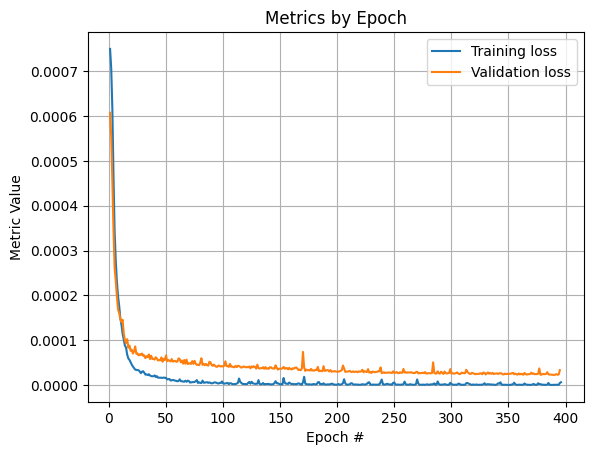

univariate NN layers50-250 training factors=ti4-ct4-xD4-yD4


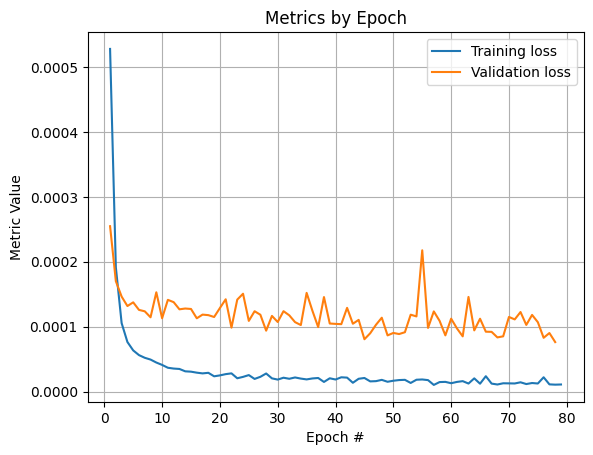

In [4]:
# INTERPOLATION ON COORDS - REDUCTION FACTOR 4
for log in logs:
    if "xD4" in log.name and "64" not in log.name:
        print(log.name)
        log.plot_metrics_by_epoch()
        if "NeRF" in log.name:
            interesting_logs_NeRF.append(log)
        elif "NN" in log.name:
            interesting_logs_NN.append(log)

univariate NeRF 256fourier-features layers256-256-256 training factors=ti4-ct4


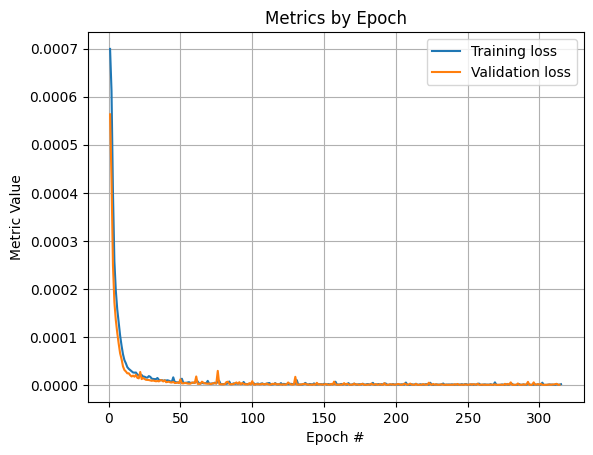

univariate NN layers50-250 training factors=ti4-ct4


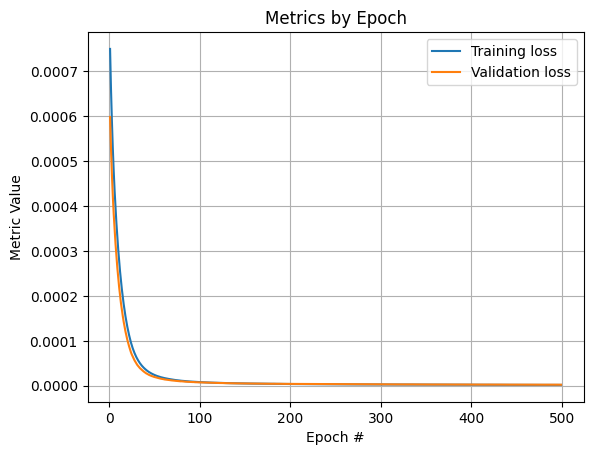

In [5]:
# INTERPOLATION - REDUCTION FACTOR 4
for log in logs:
    if "ti4" in log.name and "xD" not in log.name and "64" not in log.name and not "multivariate" in log.name:
        print(log.name)
        log.plot_metrics_by_epoch()
        if "NeRF" in log.name:
            interesting_logs_NeRF.append(log)
        elif "NN" in log.name:
            interesting_logs_NN.append(log)

univariate NN layers50-250 training ranges=ti0.15-0.4-ct0.3-0.7


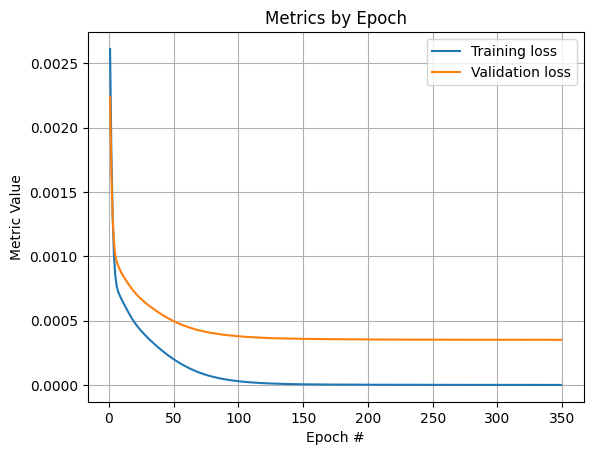

univariate NeRF 64fourier-features layers128-256-32 training ranges=ti0.15-0.4-ct0.3-0.7


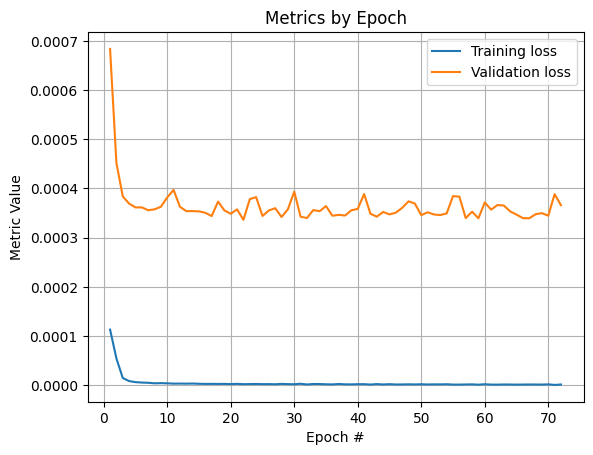

In [6]:
# EXTRAPOLATION
for log in logs:
    if "ranges" in log.name and "multivariate" not in log.name:
        print(log.name)
        log.plot_metrics_by_epoch()
        if "NeRF" in log.name:
            interesting_logs_NeRF.append(log)
        elif "NN" in log.name:
            interesting_logs_NN.append(log)

univariate NeRF 256fourier-features layers256-256-256 training factors=ti4-ct4-xD4-yD4
univariate NeRF 256fourier-features layers256-256-256 training factors=ti4-ct4
univariate NeRF 64fourier-features layers128-256-32 training ranges=ti0.15-0.4-ct0.3-0.7


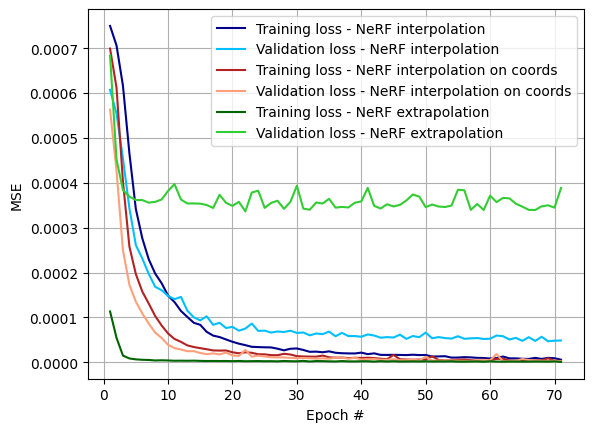




univariate NN layers50-250 training factors=ti4-ct4-xD4-yD4
univariate NN layers50-250 training factors=ti4-ct4
univariate NN layers50-250 training ranges=ti0.15-0.4-ct0.3-0.7


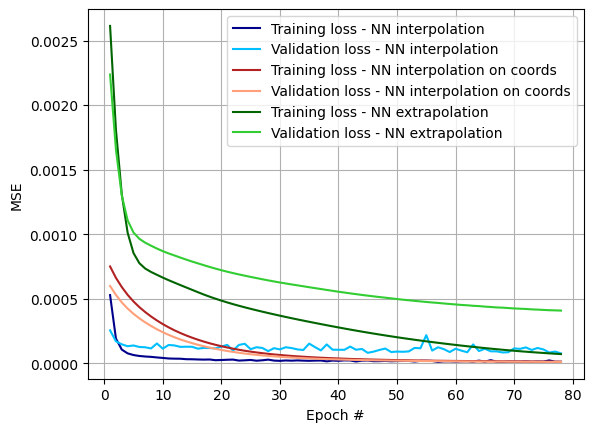

In [11]:
# COMBINING
for log in interesting_logs_NeRF:
    print(log.name)
MetricsLogger.plot_many_logs_metrics_by_epoch(interesting_logs_NeRF, names=["NeRF interpolation", "NeRF interpolation on coords", "NeRF extrapolation"])#, end_at_epoch=100)
print("\n\n")
for log in interesting_logs_NN:
    print(log.name)
MetricsLogger.plot_many_logs_metrics_by_epoch(interesting_logs_NN, names=["NN interpolation", "NN interpolation on coords", "NN extrapolation"])